# Traitement du fichier merged_data.csv

Vous pouvez retrouver les explications détaillées des différents graphiques dans le rapport du projet.

#### Liste des modifications effectuées sur le fichier merged_data.csv

C'est un récapitualif des **modifications** faites dans les fichiers eda_date, eda_prix, eda_tri. Ils restent tout de même intéressant de consulter ces fichiers car ils donnent plus de détails sur les raisons de ces modifications, grâce notamment à des visualisations ou des affichages particuliers du dataset.  
La deuxième partie de ce fichier sera nos premières **visualisations** sur le dataset corrigé.

**1. Suppression des lignes inutiles**

- le nom de point de vente ne concerne pas le PIC
- familles d'article trop peu présents dans le fichier 
- familles d'article non vendus par le PIC
- article trop peu présent dans le fichier
- quantité négative -> retour de produit
- prix total négatif -> retour de produit ou d'ecocup
- quantité > 50 -> fut commandé par des assos (non consommé par un magnifique client)
- prix total > 50€ -> article soit commandé en trop grande quantité, soit commandé par des assos (non consommé par un magnifique client)
- correspondant au samedi et dimanche -> ne correspond à notre étude
- les données d'inter-semestre -> ne correspond à notre étude

**2. Suppression des colonnes inutiles**
- Activité
- Nom point de vente

**3. Modification sur le tableau restant**
- colonne date :
  - suppression des millisecondes
  - transformation au format datetime
- colonne famille d'article :
  - remplacer les valeurs manquantes
  - fusion des familles d'article ayant la même signification (ex : "Bière bouteille" et "Bière pression" deviennent "Bière")
- colonne article :
  - transformation en minuscule et sans accent
  - fusion des articles ayant la même signification (ex : "Chimay bouteille" et "Chimay pression" deviennent "Chimay")
 
**4. Ajout de colonnes**

- "periode" :
  - correspond à "matin", "midi", "après-midi" ou "soir"
  - depuis l'heure de la vente
- "Jour" :
  - correspond au jour de la semaine
  - depuis la date de la vente 
- "Semestre" :
  - correspond au semestre de l'année
  - depuis la date de la vente


In [37]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

data_folder = os.path.join(os.getcwd(), '../data_original')
df = pd.read_csv(os.path.join(data_folder, 'merged_data.csv'), sep=',')

nb_lignes_initiales = df.shape[0]

df = df.drop(['Activité'], axis=1)

/tmp/ipykernel_5090/4147882283.py:8: DtypeWarning: Columns (2,8) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(os.path.join(data_folder, 'merged_data.csv'), sep=',')


In [38]:
# ----------------------------- Nom point de vente -----------------------------
df['Nom point de vente'].fillna('Pic', inplace=True)
df = df[df['Nom point de vente'].str.contains('Pic')]
df = df.drop(columns=["Nom point de vente"], axis=1)

In [39]:

# ----------------------------- Article et Famille d'article -----------------------------
nom_famille = df[df["Article"] == "PAMPRYL Fraise"]["Famille d'article"].unique()[0]
df.loc[df["Article"] == "Pampryl Tomate", "Famille d'article"] = nom_famille
df.loc[df["Article"] == "petit dej rugby", "Famille d'article"] = "dej"

white_list = {'Viennoiserie', 'Café & Thé', 'Rauch (RIP pampryls)', 'Snacks Sucrés',
                'Softs', 'Snacks Salés', 'Perms', 'Repas', 'Glacé', 'Bières bouteilles',
                'Bières pression', 'Fruits & Légumes', 'pic nic electro', 'Prix unique',
                'Semaine Blanche', 'Pic', 'Les MotherFuckers', 'Profs',
                'Festupic', "Pic'Saoul", 'UTC pour tous', 'FINEPIC', 'Mini Duvel',
                'Battle Smash', 'Pampryls', 'Ébène', 'Poulet', 'Vrac', 'Saucisson', 'Picasso', 'Pic-nique électro',
                'Permanence', 'Perm des grands', 'Assos', 'Chips', 'Céréales', 'PICASSO', 'Pic et pic et collegram',
                'Bières rapides', 'Pic, pic & colegram', 'Ben wins', 'Perm Restauration', 'Pictator - Dime'}
df = df[df["Famille d'article"].isin(white_list)]
df["Famille d'article"] = df["Famille d'article"].replace("Rauch (RIP pampryls)", "Pampryls")

n_data = df.shape[0]
values_counts = df["Famille d'article"].value_counts()
cumul_ratio = values_counts.cumsum() / n_data
n_familles_garder = cumul_ratio[cumul_ratio < 0.99].shape[0] + 1
familles_garder = df["Famille d'article"].value_counts().index[:n_familles_garder]
df = df[df["Famille d'article"].isin(familles_garder)]

df = df[df['Famille d\'article'] != 'Perms']
df["Famille d'article"] = df["Famille d'article"].replace("Bières bouteilles", "Bieres")
df["Famille d'article"] = df["Famille d'article"].replace("Bières pression", "Bieres")

n_data = df.shape[0]
values_counts = df["Article"].value_counts()
cumul_ratio = values_counts.cumsum() / n_data
n_articles_garder = cumul_ratio[cumul_ratio < 0.99].shape[0] + 1
articles_garder = df["Article"].value_counts().index[:n_articles_garder]
df = df[df["Article"].isin(articles_garder)]

df = df[df["Article"].str.contains("Ecocup") == False]
df = df[df["Article"].str.contains("ecocup") == False]

df["Article"] = df["Article"].str.lower()
accents = ["é", "è", "ê", "ë"]
for accent in accents:
    df["Article"] = df["Article"].str.replace(accent, "e")

df = df[df["Article"] != "if **silly rouge**"]
df = df[df["Article"] != "vert"]
df = df[df["Article"] != "rouge"]
df = df[df["Article"] != "jaune"]
df = df[df["Article"] != "bleu"]
df = df[df["Article"] != "courant"]
df = df[df["Article"] != "1/4 fromage chimay"]
df = df[df["Article"] != "1/4 fromage chimay + 1/3 baguette"]
df = df[df["Article"] != "sandwich invendu"]
df = df[df["Article"] != "invendus boulangerie"]

df["Article"] = df["Article"].str.replace("val dieu triple.*", "val dieu triple", regex=True)
df["Article"] = df["Article"].str.replace("val dieu grand cru.*", "val dieu grand cru", regex=True)
df["Article"] = df["Article"].str.replace("coca.*", "coca", regex=True)
df["Article"] = df["Article"].str.replace(".*pring.*", "pringles", regex=True)
df["Article"] = df["Article"].str.replace("peche mel bush.*", "peche mel bush", regex=True)
df["Article"] = df["Article"].str.replace("kinder.*", "kinder", regex=True)
df["Article"] = df["Article"].str.replace(".*chouffe.*", "chouffe", regex=True)
df["Article"] = df["Article"].str.replace(".*up .*", "7up", regex=True)
df["Article"] = df["Article"].str.replace("sandwich.*", "sandwich", regex=True)
df["Article"] = df["Article"].str.replace("biscuit.*", "biscuit", regex=True)
df["Article"] = df["Article"].str.replace("straffe .*", "straffe hendrik", regex=True)
df["Article"] = df["Article"].str.replace("duvel .*", "duvel", regex=True)
df["Article"] = df["Article"].str.replace("barbar .*", "barbar", regex=True)
df["Article"] = df["Article"].str.replace("cookie .*", "cookie", regex=True)
df["Article"] = df["Article"].str.replace(".*belin.*", "belin", regex=True)
df["Article"] = df["Article"].str.replace("kit kat .*", "kit kat", regex=True)
df["Article"] = df["Article"].str.replace(".*nouille.*", "nouille", regex=True)
df["Article"] = df["Article"].str.replace(".*saucisson.*", "saucisson", regex=True)
df["Article"] = df["Article"].str.replace(".*viennoiserie.*", "suisse", regex=True)
df["Article"] = df["Article"].str.replace(".*repas.*", "repas", regex=True)
df["Article"] = df["Article"].str.replace(".*hop's.*", "ardwen hop's cure", regex=True)
df["Article"] = df["Article"].str.replace("biere.*hasard", "biere hasard", regex=True)
df["Article"] = df["Article"].str.replace(".*haribo.*", "haribo", regex=True)
df["Article"] = df["Article"].str.replace(".*divine", "la divine", regex=True)
df["Article"] = df["Article"].str.replace(".*troll.*", "cuvee des trolls", regex=True)

df["Article"] = df["Article"].str.replace("saxo", "jus")
df["Article"] = df["Article"].str.replace("rauch", "jus")
df["Article"] = df["Article"].str.replace("pampryl", "jus")
df["Article"] = df["Article"].str.replace("jus oac", "jus ace")
df["Article"] = df["Article"].str.replace("valdieu triple", "val dieu triple")
df["Article"] = df["Article"].str.replace("cheese burger", "burger")
df["Article"] = df["Article"].str.replace("triple lefort", "lefort triple")
df["Article"] = df["Article"].str.replace("la poire", "poire")
df["Article"] = df["Article"].str.replace("the lipton", "ice tea pêche")
df["Article"] = df["Article"].str.replace("fuze tea", "ice tea pêche")
df["Article"] = df["Article"].str.replace("roule au nutella", "roule nutella")
df["Article"] = df["Article"].str.replace("bush 10", "bush ambree")
df["Article"] = df["Article"].str.replace("coeur orange", "orange")
df["Article"] = df["Article"].str.replace("orange pavot", "orange")
df["Article"] = df["Article"].str.replace("chips naten bio", "chips")
df["Article"] = df["Article"].str.replace("pepsi bouteille", "coca")
df["Article"] = df["Article"].str.replace("tripel karmeliet", "triple karmeliet")
df["Article"] = df["Article"].str.replace("jus pampl.", "jus pamplemousse", regex=False)
df["Article"] = df["Article"].str.replace("peach mel bush", "peche mel bush")
df["Article"] = df["Article"].str.replace("ice tea pêche", "ice tea peche")
df["Article"] = df["Article"].str.replace("1 bâton de berger", "saucisson")
df["Article"] = df["Article"].str.replace("banzai noodle", "nouille")
df["Article"] = df["Article"].str.replace("jus orange.*", "jus orange", regex=True)

df.loc[df['Article'] == 'banane', 'Famille d\'article'] = 'Fruits & Légumes'
df.loc[df['Article'] == 'pomme', 'Famille d\'article'] = 'Fruits & Légumes'
df.loc[df['Article'] == 'orange', 'Famille d\'article'] = 'Fruits & Légumes'
df.loc[df['Article'] == 'cookie', 'Famille d\'article'] = 'Viennoiserie'
df.loc[df['Article'] == 'ice tea peche', 'Famille d\'article'] = 'Softs'
df.loc[df['Article'] == 'jus orange', 'Famille d\'article'] = 'Pampryls'
df.loc[df['Article'] == 'nouille', 'Famille d\'article'] = 'Repas'
df.loc[df['Article'] == 'cacahuetes grillees', 'Famille d\'article'] = 'Vrac'
df.loc[df['Article'] == 'biscuit', 'Famille d\'article'] = 'Snacks Sucrés'
df.loc[df['Article'] == 'belvita', 'Famille d\'article'] = 'Snacks Sucrés'
df.loc[df['Article'] == 'cecemel', 'Famille d\'article'] = 'Softs'
df.loc[df['Article'] == 'fruits secs et noix', 'Famille d\'article'] = 'Vrac'
df.loc[df['Article'] == 'cappuccino', 'Famille d\'article'] = 'Café & Thé'
df.loc[df['Article'] == 'dragibus', 'Famille d\'article'] = 'Snacks Sucrés'
df.loc[df['Article'] == 'nappe chocolat', 'Famille d\'article'] = 'Snacks Sucrés'
df.loc[df['Article'] == 'chouchou miel', 'Famille d\'article'] = 'Snacks Sucrés'
df.loc[df['Article'] == 'boule 3 choco', 'Famille d\'article'] = 'Snacks Sucrés'
df.loc[df['Famille d\'article'] == 'Vrac', 'Famille d\'article'] = 'Snacks Salés'
df.loc[(df['Famille d\'article'] == 'Bieres') & (df['Article'] == 'poire'), 'Article'] = 'poire (cidre)'
df.loc[df['Article'] == 'jus pomme cassis', 'Famille d\'article'] = 'Pampryls'

df = df[df['Article'] != 'repas']
df = df[df['Famille d\'article'] != 'Vrac']

In [40]:

# ----------------------------- Prix et date --------------------------------

# ----------------------------- REGEX et Datetime --------------------------------
df['Date/heure transaction'] = df['Date/heure transaction'].str.replace('\.\d+', '', regex=True)
df['Date/heure transaction'] = pd.to_datetime(df['Date/heure transaction'], format='%Y-%m-%d %H:%M:%S')

# ----------------------------- Periode de la journee -----------------------------
def determine_periode(date):
    heure = date.hour
    if 5 <= heure < 12:
        return 'matin'
    elif 12 <= heure < 15:
        return 'midi'
    elif 15 <= heure < 19:
        return 'apresmidi'
    else:
        return 'soir'

df['Periode'] = df['Date/heure transaction'].apply(determine_periode)

# ----------------------------- Jour de la semaine -----------------------------
jours_semaine = ['lundi', 'mardi', 'mercredi', 'jeudi', 'vendredi', 'samedi', 'dimanche']
df['Jour semaine'] = df['Date/heure transaction'].apply(lambda x: jours_semaine[x.weekday()])

# ----------------------------- Semestre -----------------------------
def determine_semestre(date):
    jour = date.day
    mois = date.month
    annee = date.year
    
    if mois == 1 and jour <= 20:
        return 'A' + str(annee - 1)[2:]
    elif (mois == 1 and jour > 20) or (mois == 2 and jour <= 20):
        return 'IS'
    elif (mois == 2 and jour > 20) or (mois == 3) or (mois == 4) or (mois == 5) or (mois == 6):
        return 'P' + str(annee)[2:]
    elif mois == 7 or mois == 8:
        return 'IS'
    elif mois == 9 or mois == 10 or mois == 11 or mois == 12:
        return 'A' + str(annee)[2:]

df['Semestre'] = df['Date/heure transaction'].apply(determine_semestre)

# Ajout d'une colonne automne printemps
def determine_automne_printemps(semestre):
    if semestre[0] == 'A':
        return 'A'
    elif semestre[0] == 'P':
        return 'P'
    else:
        return 'IS'

df['Automne/Printemps'] = df['Semestre'].apply(determine_automne_printemps)

# ----------------------------- Suppression -----------------------------
df = df[df['Semestre'] != 'IS']

df = df[df['Jour semaine'] != 'samedi']
df = df[df['Jour semaine'] != 'dimanche']


# ----------------------------- Prix -----------------------------------

# On supprime les lignes ayant des prix négatifs
df = df[df['Total TTC'] > 0]
df = df[df['Total TTC'] <= 50]
df = df[df['Quantité'] > 0]
df = df[df['Quantité'] <= 50]

In [41]:
nb_lignes_finales = df.shape[0]

print("Nombre de lignes supprimées : " + str(nb_lignes_initiales - nb_lignes_finales))
print("Ce qui permet de conserver : " + str(round(nb_lignes_finales / nb_lignes_initiales * 100, 2)) + "% des lignes initiales")

Nombre de lignes supprimées : 308972
Ce qui permet de conserver : 84.5% des lignes initiales


# Visualisation des modifications

<AxesSubplot:ylabel='Periode'>

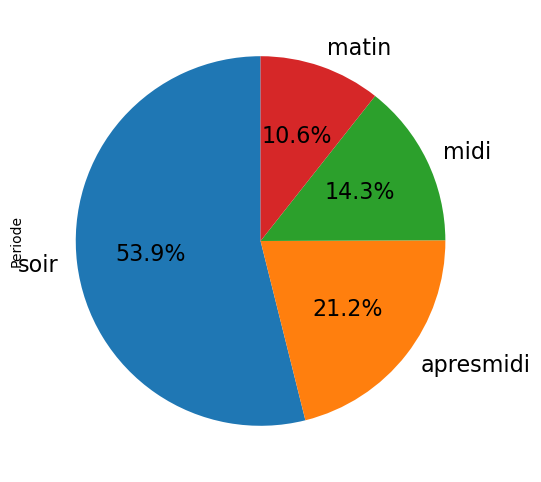

In [43]:
df['Periode'].value_counts().plot(kind='pie', figsize=(6, 6), autopct='%1.1f%%', startangle=90, fontsize=16)

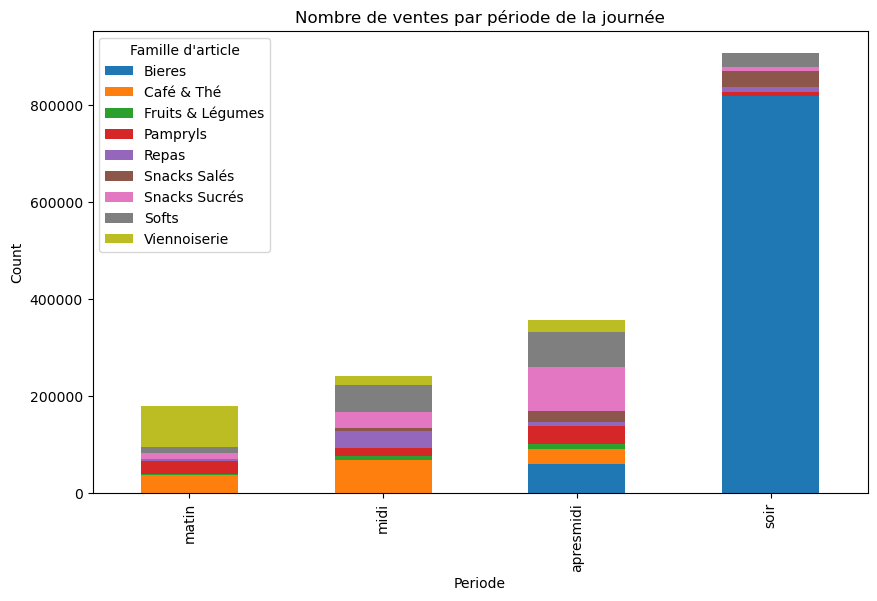

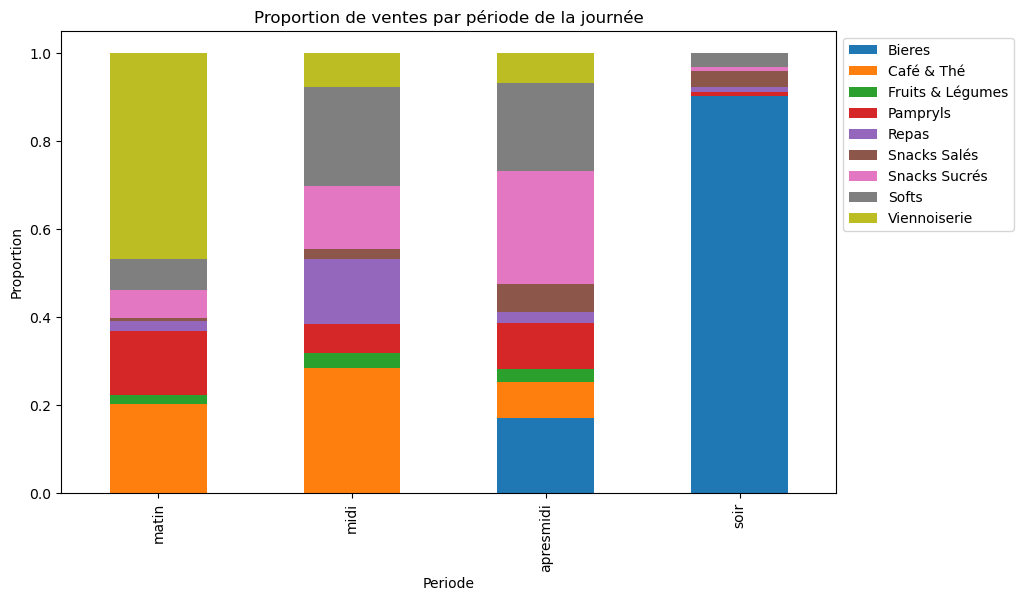

In [44]:
periode_order = ['matin', 'midi', 'apresmidi', 'soir']
df_temp = df
df_temp['Periode'] = pd.Categorical(df['Periode'], categories=periode_order, ordered=True)

crosstab = pd.crosstab(df['Periode'], df['Famille d\'article'])
crosstab_norm = crosstab.div(crosstab.sum(axis=1), axis=0)

fig, ax = plt.subplots(figsize=(10, 6))
crosstab.plot(kind='bar', stacked=True, ax=ax)
ax.set_ylabel('Count')
ax.set_title('Nombre de ventes par période de la journée')

fig, ax = plt.subplots(figsize=(10, 6))
crosstab_norm.plot(kind='bar', stacked=True, ax=ax)
ax.set_ylabel('Proportion')
ax.set_title('Proportion de ventes par période de la journée')

ax.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.show()

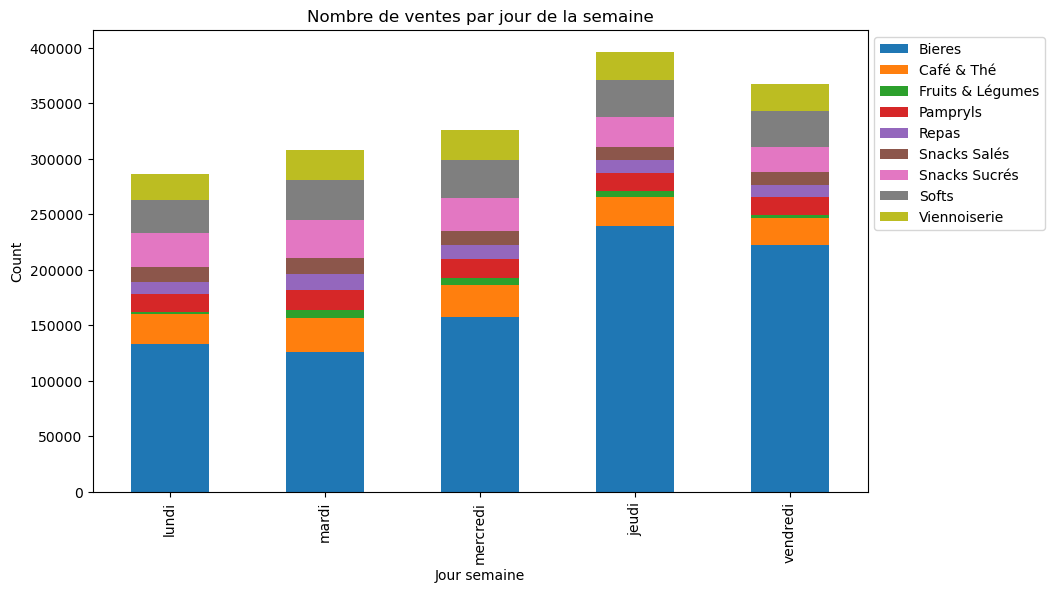

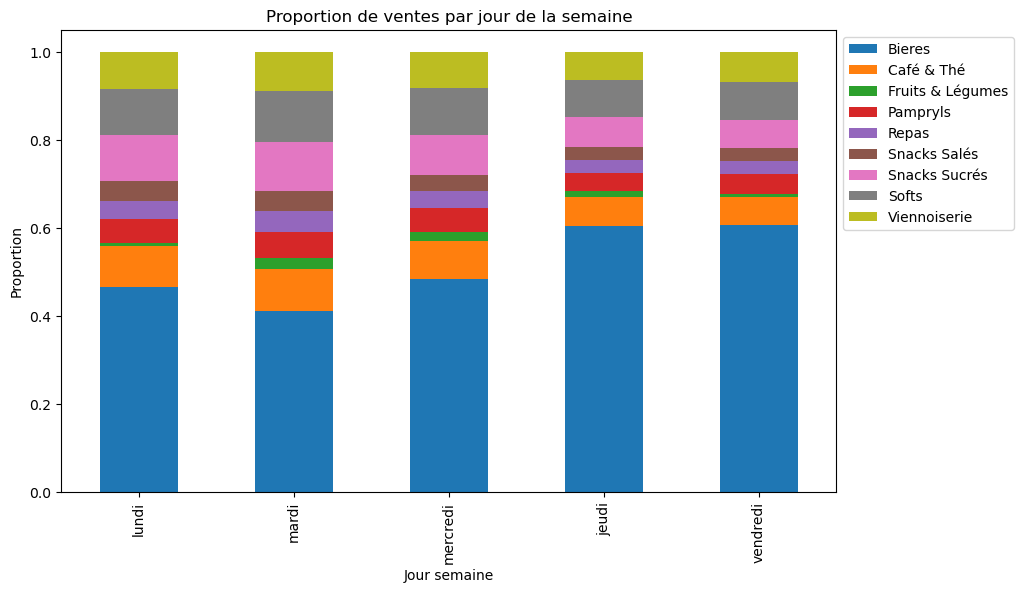

In [45]:
day_order = ['lundi', 'mardi', 'mercredi', 'jeudi', 'vendredi']
df_temp = df
df_temp['Jour semaine'] = pd.Categorical(df['Jour semaine'], categories=day_order, ordered=True)

crosstab = pd.crosstab(df['Jour semaine'], df['Famille d\'article'])
crosstab_norm = crosstab.div(crosstab.sum(axis=1), axis=0)

fig, ax = plt.subplots(figsize=(10, 6))
crosstab.plot(kind='bar', stacked=True, ax=ax)
ax.set_ylabel('Count')
ax.set_title('Nombre de ventes par jour de la semaine')

ax.legend(loc='upper left', bbox_to_anchor=(1, 1))

fig, ax = plt.subplots(figsize=(10, 6))
crosstab_norm.plot(kind='bar', stacked=True, ax=ax)
ax.set_ylabel('Proportion')
ax.set_title('Proportion de ventes par jour de la semaine')

ax.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.show()

<AxesSubplot:>

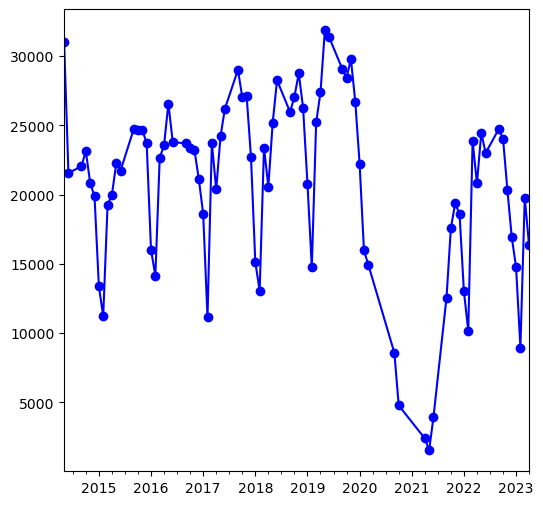

In [46]:
#df['Date/heure transaction'].dt.to_period('M').value_counts().sort_index().plot(kind='line', figsize=(6, 6))
df['Date/heure transaction'].dt.to_period('M').value_counts().sort_index().ewm(span=3).mean().plot(kind='line', figsize=(6, 6), color='blue', label='Moyenne mobile', marker='o')

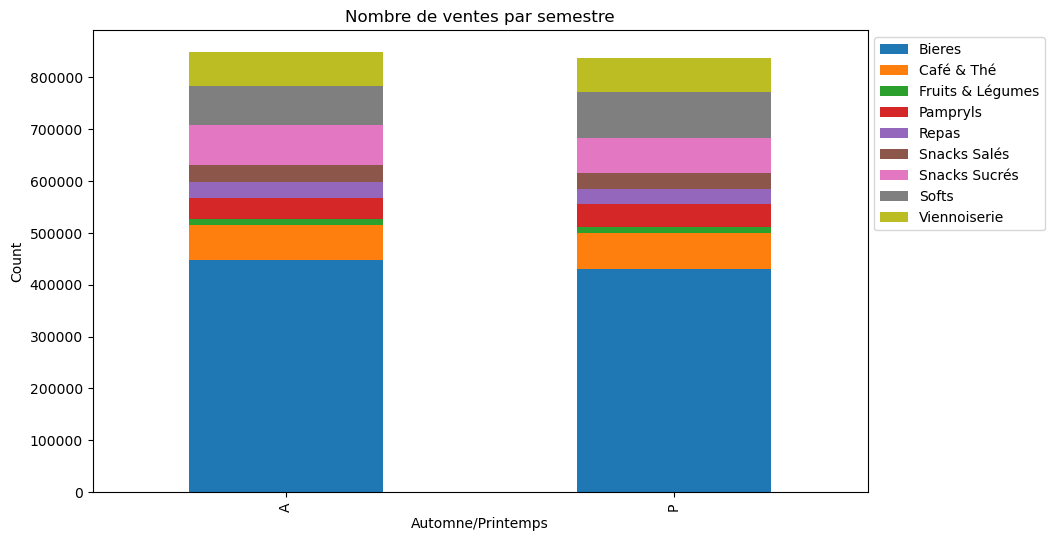

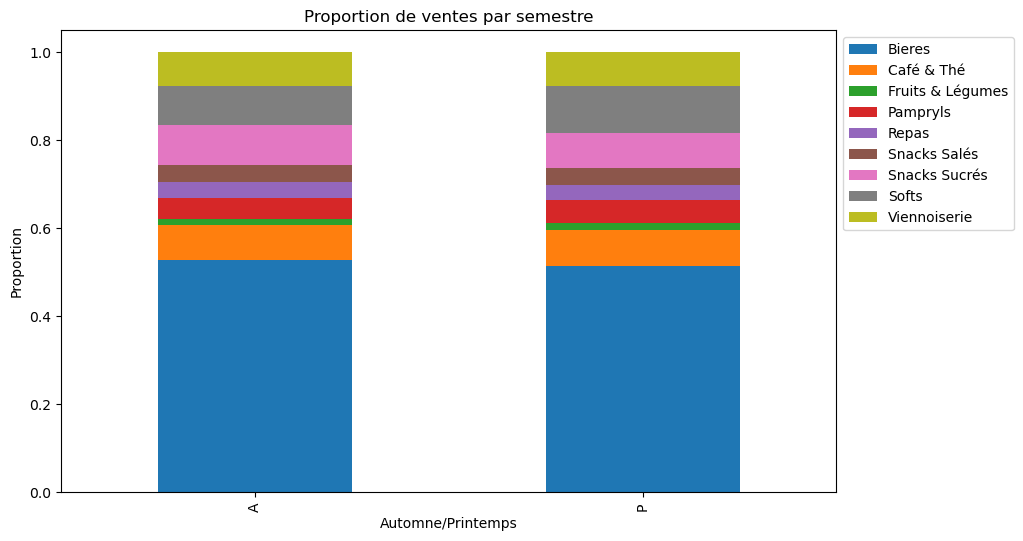

In [47]:
crosstab = pd.crosstab(df['Automne/Printemps'], df['Famille d\'article'])
crosstab_norm = crosstab.div(crosstab.sum(axis=1), axis=0)

fig, ax = plt.subplots(figsize=(10, 6))
crosstab.plot(kind='bar', stacked=True, ax=ax)
ax.set_ylabel('Count')
ax.set_title('Nombre de ventes par semestre')
ax.legend(loc='upper left', bbox_to_anchor=(1, 1))

fig, ax = plt.subplots(figsize=(10, 6))
crosstab_norm.plot(kind='bar', stacked=True, ax=ax)
ax.set_ylabel('Proportion')
ax.set_title('Proportion de ventes par semestre')
ax.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.show()

In [48]:
df["Quantité"].unique()

array([ 1.,  2.,  7.,  3.,  4.,  5.,  9.,  8., 24., 15.,  6., 20., 18.,
       23., 12., 10., 14., 27., 19., 11., 16., 17., 13., 21., 22., 32.,
       42., 40.])

<AxesSubplot:xlabel='Date/heure transaction'>

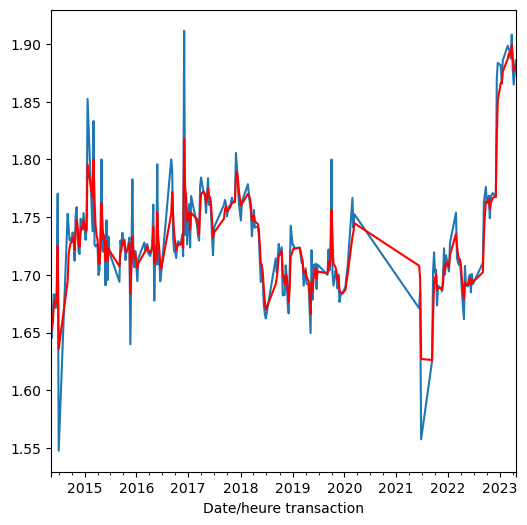

In [49]:
# On regarde l'évolution du prix unitaire moyen par mois des articles contenant le mot Bière
df[df['Famille d\'article'].str.contains('Biere')].groupby(df['Date/heure transaction'].dt.to_period('W'))['Prix unitaire TTC'].mean().sort_index().plot(kind='line', figsize=(6, 6))
# EWM
df[df['Famille d\'article'].str.contains('Biere')].groupby(df['Date/heure transaction'].dt.to_period('W'))['Prix unitaire TTC'].mean().sort_index().ewm(span=3).mean().plot(kind='line', figsize=(6, 6), color='red')

# Vérification des modifications
On s'assure que nous n'avons pas oublier certains traitements sur les données

In [50]:
# On tri le df par date
df = df.sort_values(by=['Date/heure transaction'])

In [51]:
pd.set_option('display.float_format', lambda x: '%.2f' % x)
df['Total TTC'].describe()

count   1685008.00
mean          1.40
std           1.15
min           0.07
25%           0.65
50%           1.60
75%           1.80
max          49.20
Name: Total TTC, dtype: float64

<AxesSubplot:>

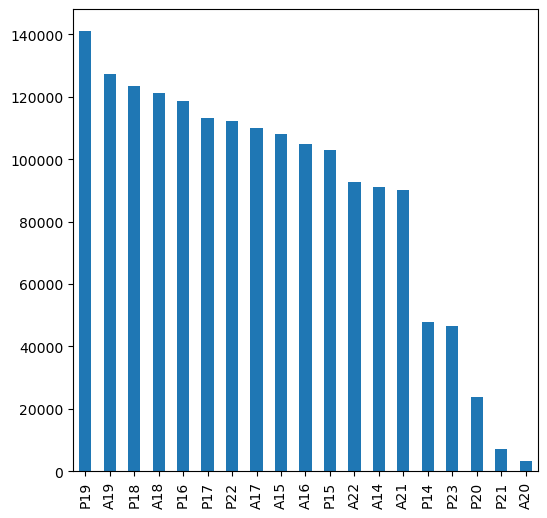

In [53]:
df['Semestre'].value_counts().plot(kind='bar', figsize=(6, 6))

In [55]:
pd.set_option('display.float_format', lambda x: '%.2f' % x)
df['Prix unitaire TTC'].describe()

count   1685008.00
mean          1.24
std           0.64
min           0.07
25%           0.65
50%           1.60
75%           1.80
max           4.50
Name: Prix unitaire TTC, dtype: float64

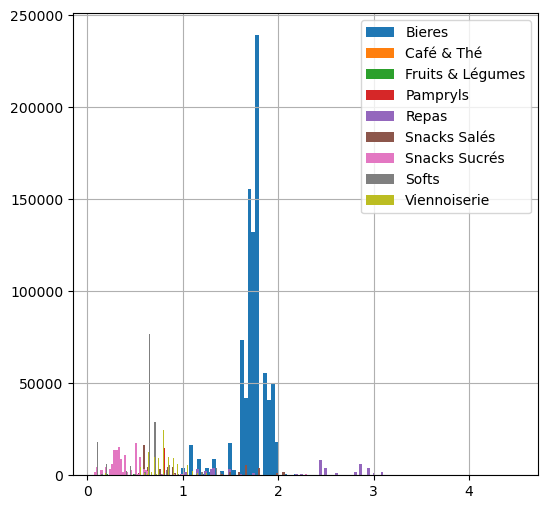

In [57]:
# On regroupe par article et on regarde l'histogramme des prix unitaires
grouped = df.groupby('Famille d\'article')['Prix unitaire TTC']
grouped.hist(bins=100, figsize=(6, 6))
plt.legend(grouped.groups.keys(), loc='upper right')
plt.show()